In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# load data
cdc = pd.read_csv('https://www.openintro.org/stat/data/cdc.csv')
cdc

,genhlth,exerany,hlthplan,smoke100,height,weight,wtdesire,age,gender
0,good,0,1,0,70,175,175,77,m
1,good,0,1,1,64,125,115,33,f
2,good,1,1,1,60,105,105,49,f
3,good,1,1,0,66,132,124,42,f
4,very good,0,1,0,61,150,130,55,f
...,...,...,...,...,...,...,...,...,...
19995,good,1,1,0,66,215,140,23,f
19996,excellent,0,1,0,73,200,185,35,m
19997,poor,0,1,0,65,216,150,57,f
19998,good,1,1,0,67,165,165,81,f


In [2]:
cdc.columns.values

array(['genhlth', 'exerany', 'hlthplan', 'smoke100', 'height', 'weight',
       'wtdesire', 'age', 'gender'], dtype=object)

In [3]:
cdc.describe()

,exerany,hlthplan,smoke100,height,weight,wtdesire,age
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000
mean,0.745700,0.873800,0.472050,67.182900,169.68295,155.093850,45.068250
std,0.435478,0.332083,0.499231,4.125954,40.08097,32.013306,17.192689
min,0.000000,0.000000,0.000000,48.000000,68.00000,68.000000,18.000000
25%,0.000000,1.000000,0.000000,64.000000,140.00000,130.000000,31.000000
50%,1.000000,1.000000,0.000000,67.000000,165.00000,150.000000,43.000000
75%,1.000000,1.000000,1.000000,70.000000,190.00000,175.000000,57.000000
max,1.000000,1.000000,1.000000,93.000000,500.00000,680.000000,99.000000


---
## On Your Own

<ol>
    <li>Make a scatterplot of weight versus desired weight. Describe the relationship between these two variables.</li><br>
    <li> Let's consider a new variable: the difference between desired weight (<code>wtdesire</code>) and current weight (<code>weight</code>). Create this new variable by subtracting the two columns in the DataFrame and assigning them to a new object called <code>wdiff</code>.</li><br>
    <li>What type of data is <code>wdiff</code>? If an observation <code>wdiff</code> is 0, what does this mean about the person's weight and desired weight. What if <code>wdiff</code> is positive or negative?</li><br>
    <li>Describe the distribution of <code>wdiff</code> in terms of its center, shape, and spread, including any plots you use. What does this tell us about how people feel about their current weight?
</li><br>
    <li>Using numerical summaries and a side-by-side box plot, determine if men tend to view their weight differently than women.</li><br>
    <li>Now it's time to get creative. Find the mean and standard deviation of <code>weight</code> and determine what proportion of the weights are within one standard deviation of the mean.</li>
</ol>

In [8]:
# the %matplotlib can simply output the graphs within the notebook itself.
%matplotlib inline

In [9]:
# use the retina format and see which one looks better on your computer's screen.
%config InlineBackend.figure_format = 'retina'

In [11]:
# change the default style of plots. Let's go for our favourite style, ggplot from R.

plt.style.use('ggplot')

# Let's also make the size of plots and font sizes bigger.

plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['font.size'] = 12

### 1. Make a scatterplot of weight versus desired weight. Describe the relationship between these two variables.

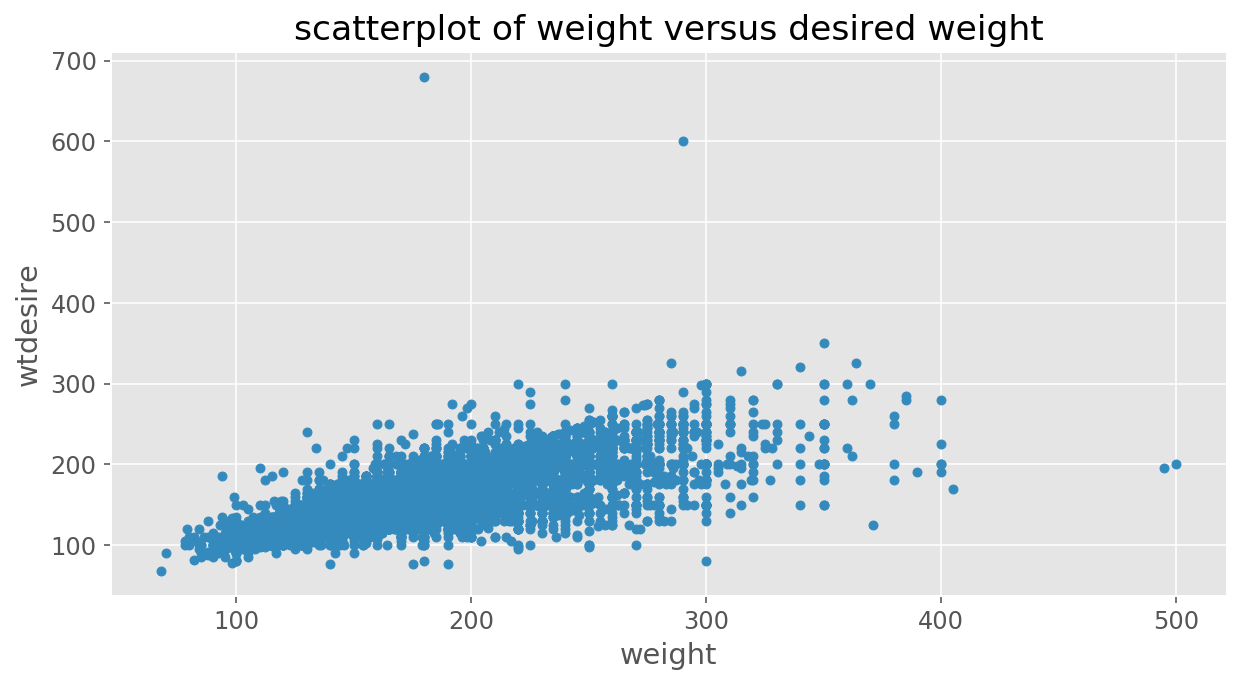

In [13]:
cdc.plot.scatter(x='weight',
                 y='wtdesire',
                 title = 'scatterplot of weight versus desired weight')

plt.show(); 

It appears a positive linear association between weight and desired weight.

### 2. Let's consider a new variable: the difference between desired weight (wtdesire) and current weight (weight). Create this new variable by subtracting the two columns in the DataFrame and assigning them to a new object called wdiff.

In [14]:
wdiff = cdc['wtdesire'] - cdc['weight']

wdiff.head(3)

0     0
1   -10
2     0
dtype: int64

### 3. What type of data is wdiff? If an observation wdiff is 0, what does this mean about the person's weight and desired weight. What if wdiff is positive or negative?

In [15]:
wdiff.dtype

dtype('int64')

The wdiff is an integer64. 

The 0 means that the weight of the case reached the desired weight.

Positive wdiff means that the weight of the case did not reach the desired weight.

Negative wdiff means that the weight of the case exceeded the desired weight.

### 4. Describe the distribution of wdiff in terms of its center, shape, and spread, including any plots you use. What does this tell us about how people feel about their current weight?

In [18]:
# Use describe() to show wdiff
wdiff.describe()

count    20000.000000
mean       -14.589100
std         24.045856
min       -300.000000
25%        -21.000000
50%        -10.000000
75%          0.000000
max        500.000000
dtype: float64

In [20]:
# show the median
wdiff.median()

-10.0

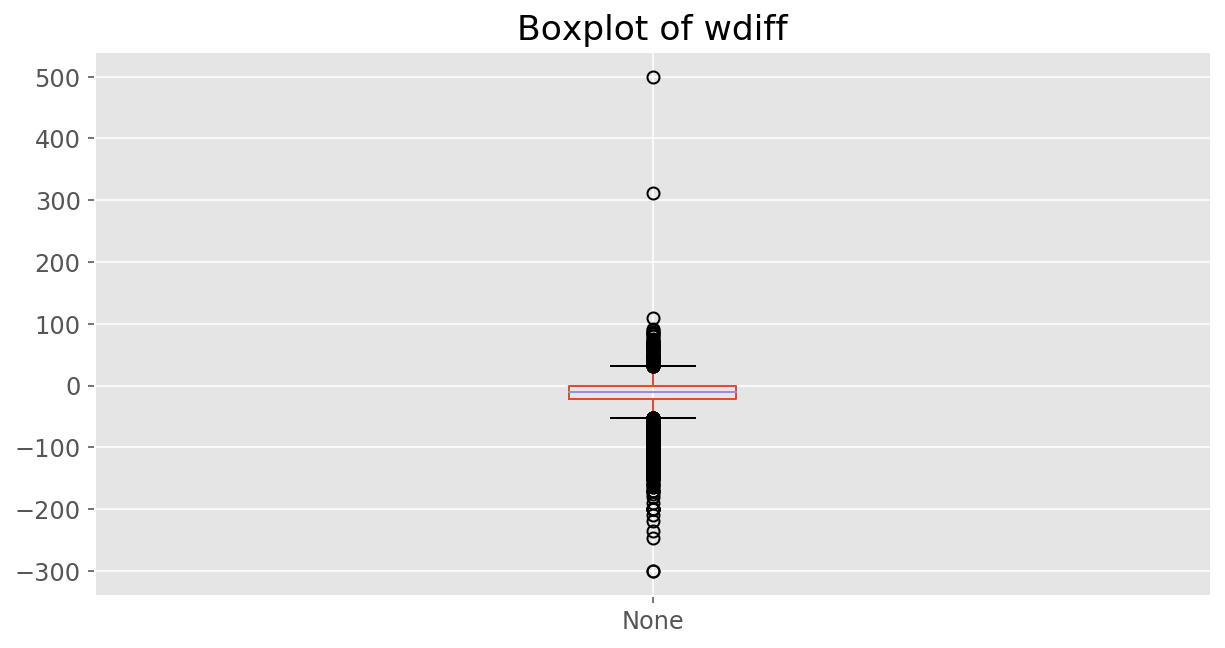

In [16]:
# Use box plot to show wdiff
wdiff.plot(kind = 'box', title = 'Boxplot of wdiff')
plt.show(); 

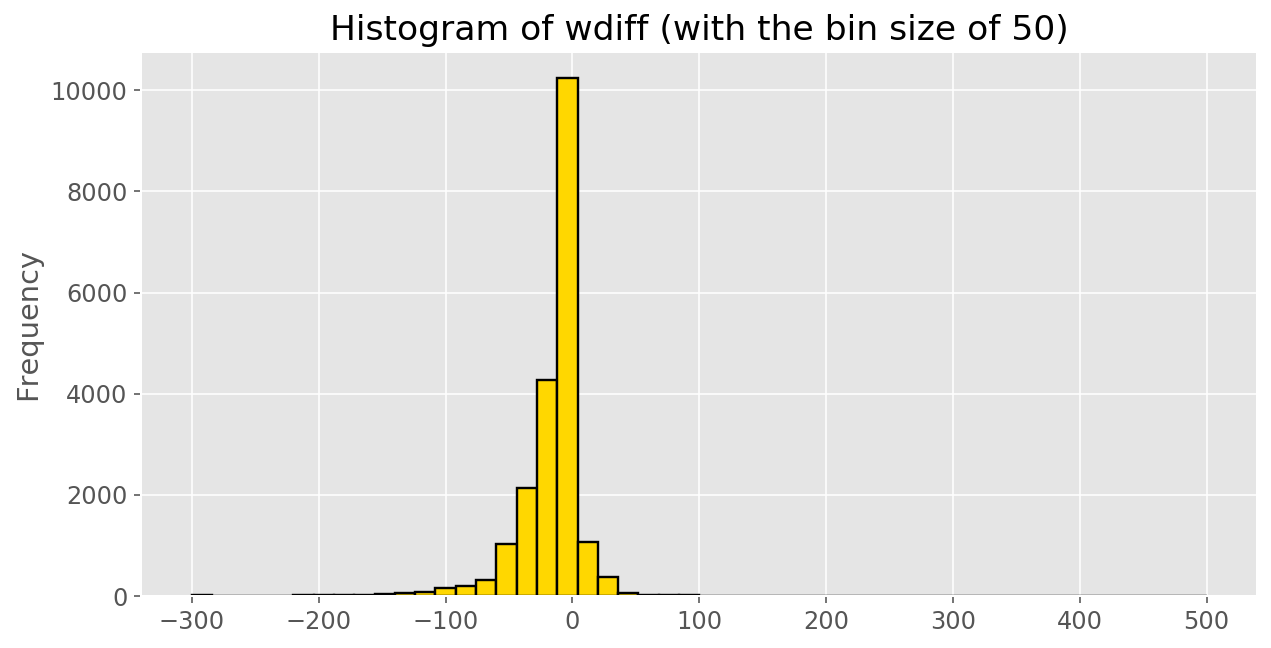

In [19]:
# Use hist plot to show wdiff
wdiff.plot(kind = 'hist', color = 'gold', edgecolor = 'black', 
         linewidth = 1.2, title = 'Histogram of wdiff (with the bin size of 50)', bins = 50)
plt.show(); 

The above description and charts show as following:

It has  a median -10.00, min of -300.00, a max of 500.00, a standard deviation of 24.05 and IQR(Q3 - Q1) = (0 - (-21)) = 21. 

It has many outliers, since the outlier lines would be (Q3+3IQR = -21 + 3 * 21 = 42) and (Q1－3IQR = 0 - 3 * 21 = -63), but the max is 500 and the min is -300.

The 50% of data concentrate between Q1(-21) to Q3(0).

The histogram shows that the wdiff is unimodal. It is a left skew.

These charts and table show that over 75% of people are overweight.

### 5. Using numerical summaries and a side-by-side box plot, determine if men tend to view their weight differently than women.

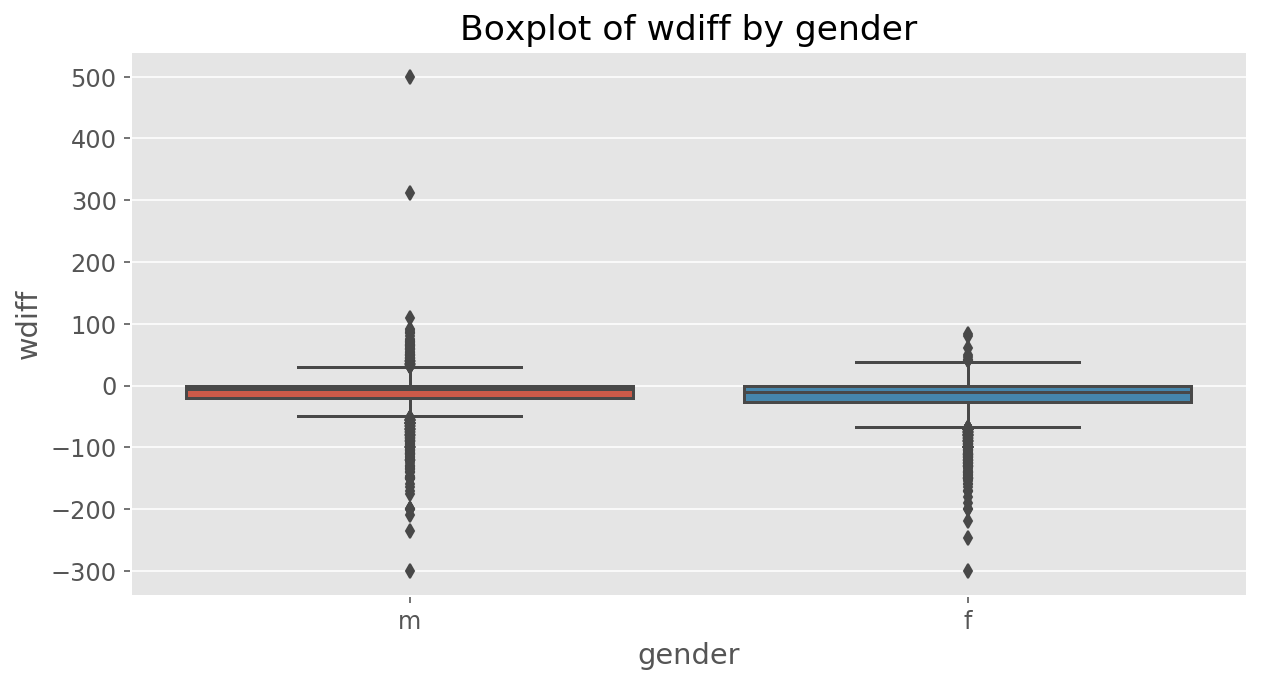

In [21]:
import seaborn as sns

sns.boxplot(x = cdc['gender'], y = wdiff).set(
    xlabel='gender', ylabel='wdiff', title = 'Boxplot of wdiff by gender')
plt.show();

The above boxplot shows that 75% of male and 75% of female weigh more than they expect. But there are more underweight outliers in male than female.

### 6.Now it's time to get creative. Find the mean and standard deviation of weight and determine what proportion of the weights are within one standard deviation of the mean.

In [22]:
# get the mean of weight from cdc
cdc.weight.mean()

169.68295

In [23]:
# get the std of weight from cdc
cdc.weight.std()

40.080969967120254

Proportion of weigths with one standard deviation of the mean

Formular: rows of ( weight > (mean + std) && weight < (mean - std) ) / total rows

In [26]:
weight_mean = cdc.weight.mean()
weight_std = cdc.weight.std()

# one standard deviation of the mean
mean_std_plus = weight_mean + weight_std
mean_std_minus = weight_mean - weight_std

within_one_std_of_mean = cdc[(cdc['weight'] < mean_std_plus) & (cdc['weight'] > mean_std_minus)]

within_one_std_of_mean.shape

(14152, 9)

In [27]:
proportion = len(within_one_std_of_mean) / len(cdc)
proportion

0.7076

70.76% of the weights in the data set are within one standard deviation of the mean.